In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data_ads = pd.read_csv('/content/drive/MyDrive/decrypted_file/train/train_data_ads.csv')
train_data_feeds = pd.read_csv('/content/drive/MyDrive/decrypted_file/train/train_data_feeds.csv')

In [ ]:
print(train_data_ads.columns)
print('###############################')
print(train_data_feeds.columns)

Index(['log_id', 'label', 'user_id', 'age', 'gender', 'residence', 'city',
       'city_rank', 'series_dev', 'series_group', 'emui_dev', 'device_name',
       'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd',
       'adv_prim_id', 'inter_type_cd', 'slot_id', 'site_id', 'spread_app_id',
       'hispace_app_tags', 'app_second_class', 'app_score',
       'ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003',
       'ad_close_list_v001', 'ad_close_list_v002', 'ad_close_list_v003',
       'pt_d', 'u_newsCatInterestsST', 'u_refreshTimes', 'u_feedLifeCycle'],
      dtype='object')
###############################
Index(['u_userId', 'u_phonePrice', 'u_browserLifeCycle', 'u_browserMode',
       'u_feedLifeCycle', 'u_refreshTimes', 'u_newsCatInterests',
       'u_newsCatDislike', 'u_newsCatInterestsST', 'u_click_ca2_news',
       'i_docId', 'i_s_sourceId', 'i_regionEntity', 'i_cat', 'i_entities',
       'i_dislikeTimes', 'i_upTimes', 'i_dtype', 'e_ch', 'e_m', 'e_po', 'e_

### **Task 1**

In [ ]:
# merged_data = pd.merge(train_data_ads, train_data_feeds, left_on='user_id', right_on='u_userId')

In [ ]:
train_data_ads['residence'].unique()

array([16, 13, 46, 33, 27, 32, 39, 44, 30, 20, 12, 22, 41, 21, 28, 17, 18,
       25, 24, 42, 45, 34, 29, 11, 26, 19, 23, 14, 31, 35, 36, 15, 37, 43,
       40])

In [ ]:
click_data = train_data_ads[train_data_ads['label'] == 1]

<ipython-input-10-435aa70d82f8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='viridis')


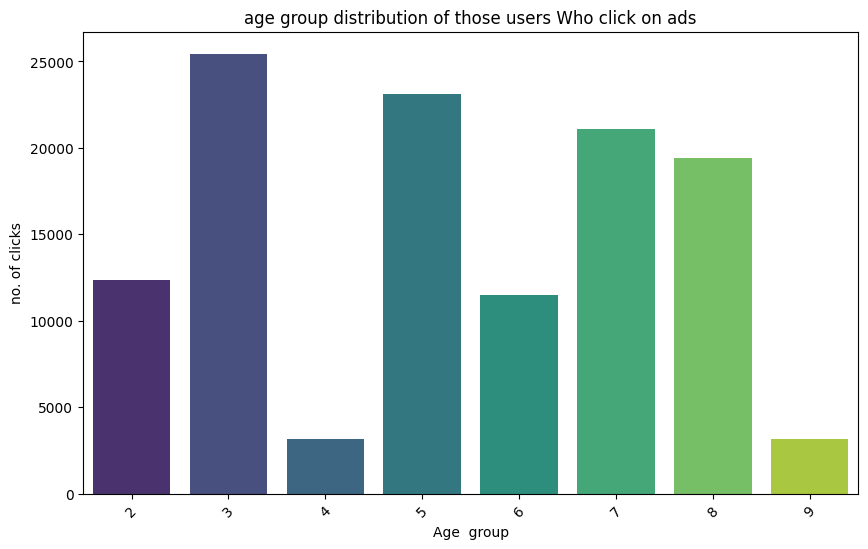

In [ ]:
age_distribution = click_data['age'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='viridis')
plt.title('age group distribution of those users Who click on ads')
plt.xlabel('Age  group')
plt.ylabel('no. of clicks')
plt.xticks(rotation=45)
plt.show()

<ipython-input-17-cffdf274b5dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_distribution.index, y=geo_distribution.values, palette='viridis')


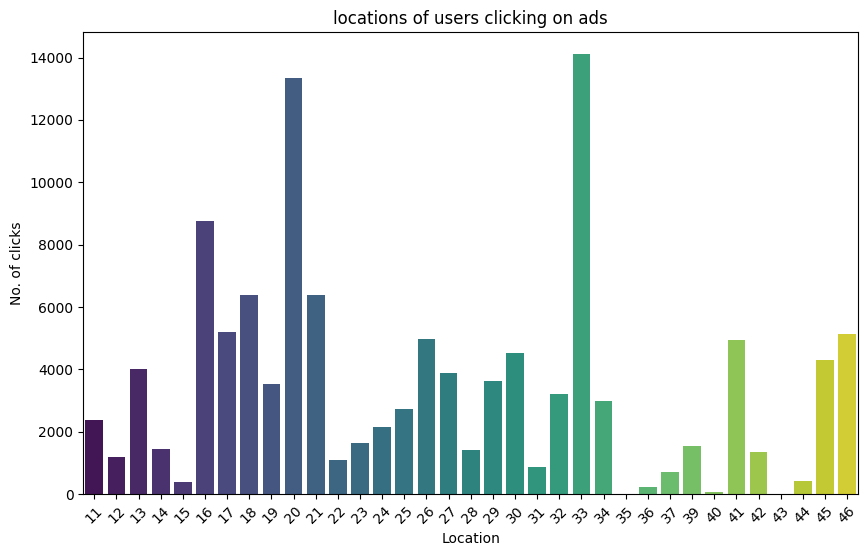

In [ ]:
geo_distribution = click_data['residence'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=geo_distribution.index, y=geo_distribution.values, palette='viridis')
plt.title('locations of users clicking on ads')
plt.xlabel('Location')
plt.ylabel('No. of clicks')
plt.xticks(rotation=45)
plt.show()

<ipython-input-22-0d1ce08898c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=device_usage.index, y=device_usage.values, palette='viridis')


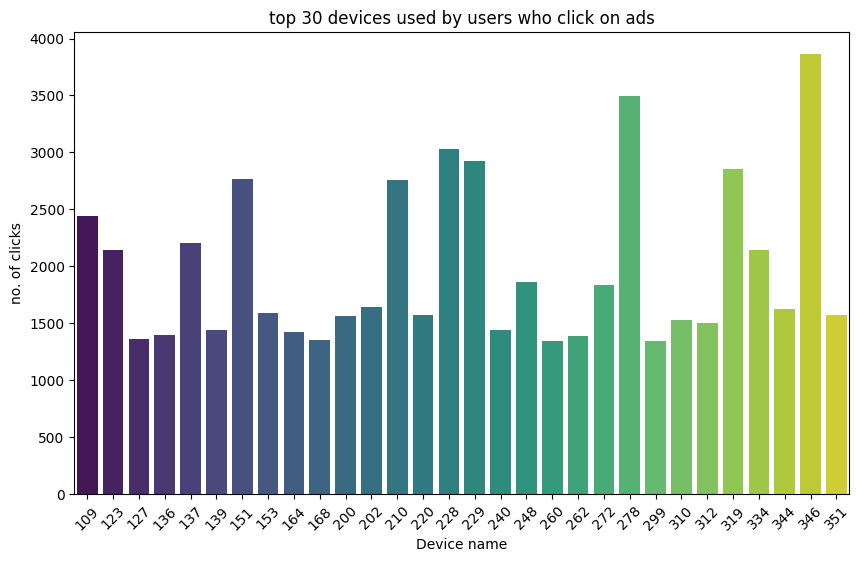

In [ ]:
device_usage = click_data['device_name'].value_counts().head(30)
plt.figure(figsize=(10, 6))
sns.barplot(x=device_usage.index, y=device_usage.values, palette='viridis')
plt.title('top 30 devices used by users who click on ads')
plt.xlabel('Device name')
plt.ylabel('no. of clicks')
plt.xticks(rotation=45)
plt.show()


In [ ]:
click_data['timestamp'] = pd.to_datetime(click_data['pt_d'], format='%Y%m%d%H%M')
click_data['hour'] = click_data['timestamp'].dt.hour
click_data['day_of_week'] = click_data['timestamp'].dt.day_name()

<ipython-input-23-e2045142b03c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_data['timestamp'] = pd.to_datetime(click_data['pt_d'], format='%Y%m%d%H%M')
<ipython-input-23-e2045142b03c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_data['hour'] = click_data['timestamp'].dt.hour
<ipython-input-23-e2045142b03c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
hour_mapping = {0: '12 AM', 1: '1 AM', 2: '2 AM', 3: '3 AM', 4: '4 AM', 5: '5 AM', 6: '6 AM', 7: '7 AM', 8: '8 AM', 9: '9 AM', 10: '10 AM', 11: '11 AM',
                12: '12 PM', 13: '1 PM', 14: '2 PM', 15: '3 PM', 16: '4 PM', 17: '5 PM', 18: '6 PM', 19: '7 PM', 20: '8 PM', 21: '9 PM', 22: '10 PM', 23: '11 PM'}
click_data['hour_label'] = click_data['hour'].map(hour_mapping)

<ipython-input-30-950d798a0650>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click_data['hour_label'] = click_data['hour'].map(hour_mapping)


<ipython-input-32-9a31675b3d69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_pattern.index, y=hourly_pattern.values, palette='viridis')


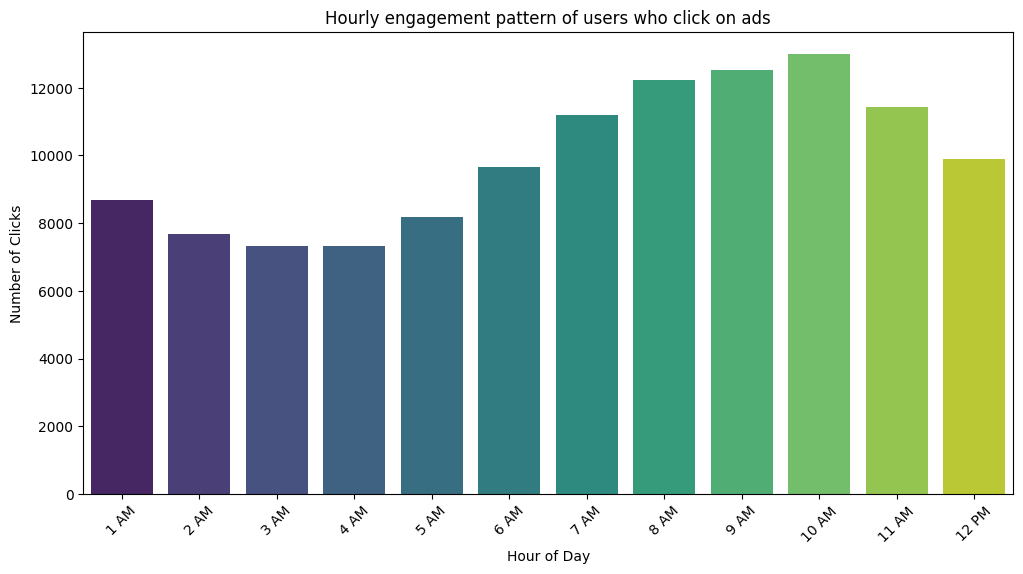

In [ ]:
hourly_pattern = click_data['hour_label'].value_counts().sort_index(key=lambda x: pd.Series(x).map(lambda y: list(hour_mapping.values()).index(y)))
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_pattern.index, y=hourly_pattern.values, palette='viridis')
plt.title('Hourly engagement pattern of users who click on ads')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)
plt.show()

<ipython-input-26-706e27282efd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_pattern.index, y=daily_pattern.values, palette='viridis')


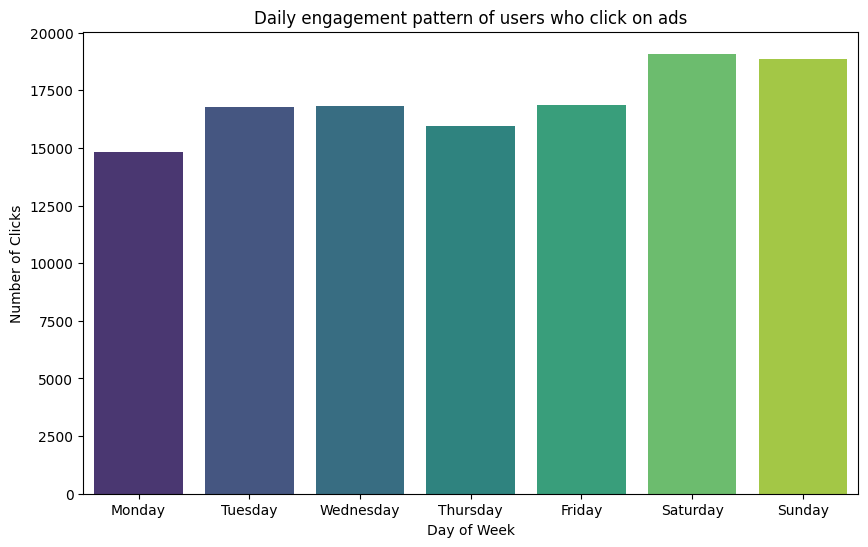

In [ ]:
daily_pattern = click_data['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pattern.index, y=daily_pattern.values, palette='viridis')
plt.title('Daily engagement pattern of users who click on ads')
plt.xlabel('Day of Week')
plt.ylabel('Number of Clicks')
plt.show()

<ipython-input-29-cb1930ea718c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_preferences.index, y=content_preferences.values, palette='viridis')


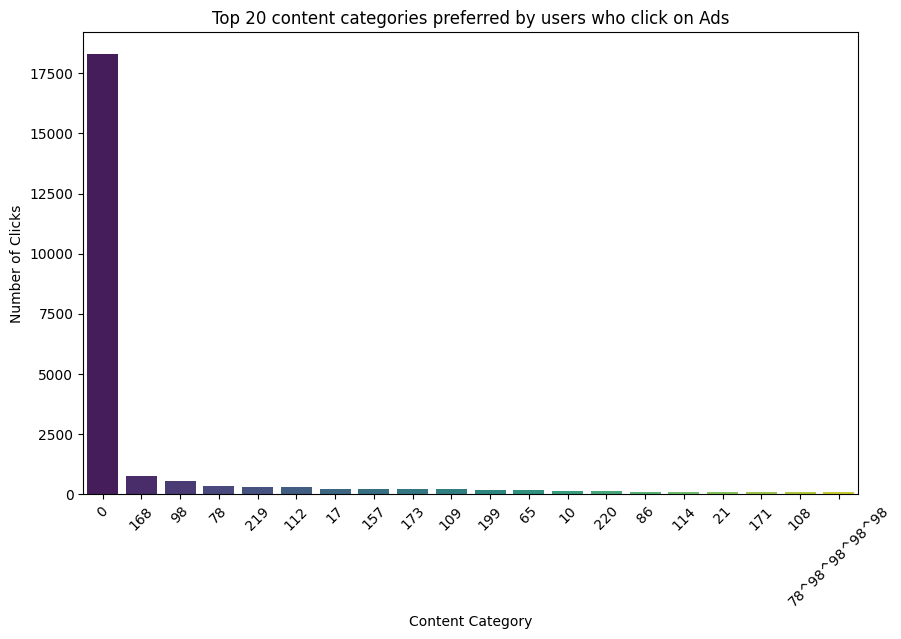

In [ ]:
content_preferences = click_data['u_newsCatInterestsST'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=content_preferences.index, y=content_preferences.values, palette='viridis')
plt.title('Top 20 content categories preferred by users who click on Ads')
plt.xlabel('Content Category')
plt.ylabel('Number of Clicks')
plt.xticks(rotation=45)
plt.show()

### **Task 2**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [ ]:
def preprocess_data(df, target_column):
    df.fillna(-1, inplace=True)
    for column in df.select_dtypes(include=['object']).columns:
        df[column] = df[column].astype(str)
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test


In [ ]:
X_train_ads, X_test_ads, y_train_ads, y_test_ads = preprocess_data(train_data_ads, 'label')
X_train_feeds, X_test_feeds, y_train_feeds, y_test_feeds = preprocess_data(train_data_feeds, 'label')

In [ ]:
rf_model_ads = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_ads.fit(X_train_ads, y_train_ads)

In [ ]:
rf_model_feeds = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_feeds.fit(X_train_feeds, y_train_feeds)

In [ ]:
y_pred_prob_ads = rf_model_ads.predict_proba(X_test_ads)[:, 1]
y_pred_prob_feeds = rf_model_feeds.predict_proba(X_test_feeds)[:, 1]

combined_prob = (y_pred_prob_ads + y_pred_prob_users) / 2

combined_pred = (combined_prob >= 0.5).astype(int)

In [ ]:
y_test_combined = np.concatenate((y_test_ads, y_test_users))
combined_pred_combined = np.concatenate((combined_pred[:len(y_test_ads)], combined_pred[len(y_test_ads):]))

In [ ]:
accuracy = accuracy_score(y_test_combined, combined_pred_combined)
precision = precision_score(y_test_combined, combined_pred_combined)
recall = recall_score(y_test_combined, combined_pred_combined)
f1 = f1_score(y_test_combined, combined_pred_combined)
roc_auc = roc_auc_score(y_test_combined, combined_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

In [ ]:
fpr, tpr, _ = roc_curve(y_test_combined, combined_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
conf_matrix = confusion_matrix(y_test_combined, combined_pred_combined)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
output_df = pd.DataFrame({
    'y_test': y_test_combined,
    'y_pred': combined_pred_combined,
    'y_prob': combined_prob
})
output_df.to_csv('combined_predictions.csv', index=False)

metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'],
    'Value': [accuracy, precision, recall, f1, roc_auc]
})
metrics_df.to_csv('evaluation_metrics.csv', index=False)

### **Task 3**

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
def preprocess_data(df):
    label_encoders = {}
    scalers = {}

    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le



    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numerical_columns:
        scaler = MinMaxScaler()
        df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
        scalers[col] = scaler

    return df, label_encoders, scalers

In [ ]:

train_ads, train_ads_label_encoders, train_ads_scalers = preprocess_data(train_data_ads)
train_feeds, train_feeds_label_encoders, train_feeds_scalers = preprocess_data(train_data_feeds)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
def build_generator(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(output_dim, activation='tanh'))
    return model

def build_discriminator(input_dim):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [ ]:
def compile_gan(generator, discriminator):
    discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    discriminator.trainable = False
    gan_input = tf.keras.Input(shape=(generator.input_shape[1],))
    generated_data = generator(gan_input)
    gan_output = discriminator(generated_data)
    gan = tf.keras.Model(gan_input, gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan


In [ ]:
def drop_columns_if_exist(df, columns):
    existing_columns = [col for col in columns if col in df.columns]
    return df.drop(columns=existing_columns)

data_ads = drop_columns_if_exist(train_ads, ['log_id', 'user_id']).values
data_feeds = drop_columns_if_exist(train_feeds, ['log_id', 'user_id']).values


In [ ]:
def train_gan(generator, discriminator, gan, data, epochs=10000, batch_size=64, print_interval=1000):
    half_batch = batch_size // 2

    for epoch in range(epochs):
        idx = np.random.randint(0, data.shape[0], half_batch)
        real_data = data[idx]
        real_labels = np.ones((half_batch, 1))

        noise = np.random.normal(0, 1, (half_batch, generator.input_shape[1]))
        fake_data = generator.predict(noise)
        fake_labels = np.zeros((half_batch, 1))

        d_loss_real = discriminator.train_on_batch(real_data, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_data, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, generator.input_shape[1]))
        valid_y = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, valid_y)

        if epoch % print_interval == 0:
            print(f"{epoch} [D loss: {d_loss[0]}] [G loss: {g_loss}]")

In [ ]:
generator_ads = build_generator(input_dim=100, output_dim=data_ads.shape[1])
discriminator_ads = build_discriminator(input_dim=data_ads.shape[1])
gan_ads = compile_gan(generator_ads, discriminator_ads)

In [ ]:
generator_feeds = build_generator(input_dim=100, output_dim=data_feeds.shape[1])
discriminator_feeds = build_discriminator(input_dim=data_feeds.shape[1])
gan_feeds = compile_gan(generator_feeds, discriminator_feeds)


In [ ]:
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

In [ ]:
def generate_synthetic_data(generator, num_samples):
    noise = np.random.normal(0, 1, (num_samples, generator.input_shape[1]))
    synthetic_data = generator.predict(noise)
    return synthetic_data

In [ ]:
train_gan(generator_ads, discriminator_ads, gan_ads, data_ads)
synthetic_data_ads = generate_synthetic_data(generator_ads, 1000)
synthetic_data_ads_dataframe = pd.DataFrame(synthetic_data_ads)
synthetic_data_ads_dataframe.to_csv('synthetic_train_ads.csv', index=False)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step
6000 [D loss: 0.6113396733999252] [G loss: 2.8370237350463867]
1/1 [==============================] - 0s 17ms/step
7000 [D loss: 0.31807437539100647] [G loss: 3.912323236465454]
1/1 [==============================] - 0s 17ms/step
8000 [D loss: 0.29534032940864563] [G loss: 2.332268714904785]
1/1 [==============================] - 0s 20ms/step
9000 [D loss: 0.40503254532814026] [G loss: 2.6969950199127197]
32/32 [==============================] - 0s 4ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [ ]:
synthetic_data_ads
synthetic_data_ads_dataframe = pd.DataFrame(synthetic_data_ads)

In [ ]:
synthetic_data_ads_dataframe.to_csv('synthetic_train_ads.csv', index=False)

In [ ]:
train_gan(generator_feeds, discriminator_feeds, gan_feeds, data_feeds)
synthetic_data_feeds = generate_synthetic_data(generator_feeds, 1000)
synthetic_data_feeds_dataframe = pd.DataFrame(synthetic_data_feeds)
synthetic_data_feeds_dataframe.to_csv('synthetic_train_feeds.csv', index=False)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 17ms/step
6000 [D loss: 0.1937438454478979] [G loss: 3.7533621788024902]
1/1 [==============================] - 0s 16ms/step
7000 [D loss: 0.11524708196520805] [G loss: 4.15816593170166]
1/1 [==============================] - 0s 17ms/step
8000 [D loss: 0.08091981336474419] [G loss: 3.3077683448791504]
1/1 [==============================] - 0s 20ms/step
9000 [D loss: 0.06170634925365448] [G loss: 4.350351810455322]
32/32 [==============================] - 0s 2ms/step


In [ ]:
def generate_synthetic_data(generator, num_samples):
    noise = np.random.normal(0, 1, (num_samples, generator.input_shape[1]))
    synthetic_data = generator.predict(noise)
    return synthetic_data

synthetic_data_ads = generate_synthetic_data(generator_ads, 1000)
synthetic_data_feeds = generate_synthetic_data(generator_feeds, 1000)

32/32 [==============================] - 0s 4ms/step


In [ ]:
print(synthetic_data_ads)

[[-3.7637011e-03  6.6226959e-01  2.2722990e-03 ...  2.9002649e-01
   7.0347357e-01  8.4891748e-01]
 [-3.5532597e-03  3.5631263e-01  9.8535120e-03 ...  4.3186164e-01
   8.4066570e-01  9.9341434e-01]
 [-7.7048754e-03  6.7953482e-02  1.7271405e-02 ...  5.7354641e-01
   7.8655350e-01  9.9087399e-01]
 ...
 [-3.9328486e-03  2.5800118e-01  1.4403984e-02 ...  6.1824256e-01
   8.3540547e-01  9.8775923e-01]
 [-1.1446256e-02 -8.4763370e-02  8.5525087e-04 ...  4.2212740e-01
   3.7691388e-01  9.8664761e-01]
 [-2.3394898e-03  4.2467988e-01  1.5644854e-02 ...  3.1547844e-01
   6.7927837e-01  9.6820086e-01]]
